# Dataset Exploration

This notebook explores the marketplace image classification dataset to understand its structure and characteristics:

- **Dataset statistics**: Analyze the distribution of images across classes (min, max, mean, std samples per class)
- **Class imbalance analysis**: Identify classes with high and low sample counts
- **Visual inspection**: Display random samples and class-specific samples to verify image quality and labeling

Using this notebook to familiarize with the dataset before training.

In [1]:
import os
import sys
from pathlib import Path

notebooks_dir = Path().absolute()
project_dir = notebooks_dir.parent

sys.path.append(project_dir)
os.chdir(project_dir)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset

In [3]:
def display_image_grid(ds: Dataset, item_idx: torch.tensor, cols=5):    
    figure = plt.figure(figsize=(8, 8))
    rows = (item_idx.shape[0] + cols - 1) // cols
    for i in range(item_idx.shape[0]):
        img, label = ds[item_idx[i]]
        figure.add_subplot(rows, cols, i + 1)
        plt.title(ds.classes[label], fontsize=8, wrap=True)
        plt.axis("off")
        plt.imshow(img)
    plt.show()

In [4]:
from dataset.dataset import MarketplaceDataModule

dm = MarketplaceDataModule(batch_size=32)
dm.setup(stage="predict")
full_ds = dm.full_dataset

Display sample images from the dataset

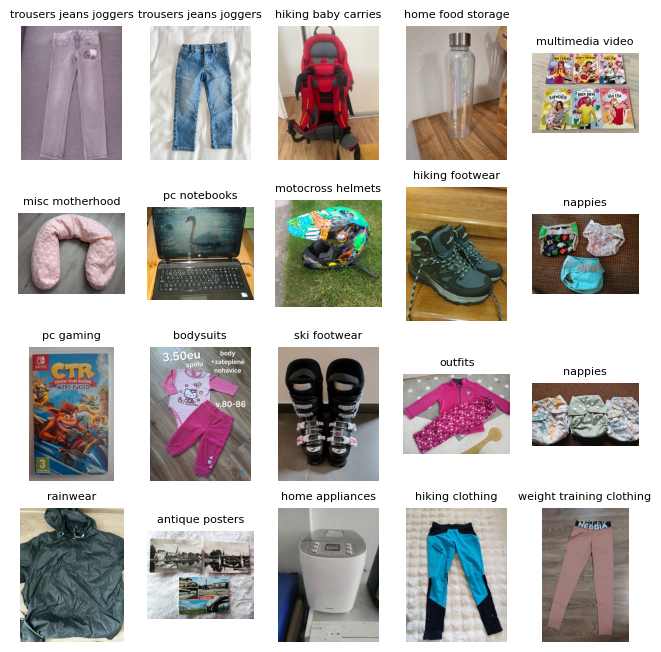

In [5]:
samples_idx = torch.randint(len(full_ds), size=(20,))
display_image_grid(full_ds, samples_idx)

Display sample images from a single class

In [5]:
def display_class_samples(class_name: str, num_samples: int = 30):
    class_idx = full_ds.class_to_idx[class_name]
    class_indices = [i for i, target in enumerate(full_ds.targets) if target == class_idx]
    n_samples = min(num_samples, len(class_indices))
    class_samples_idx = torch.tensor(class_indices)[torch.randperm(len(class_indices))[:n_samples]]
    display_image_grid(full_ds, class_samples_idx)

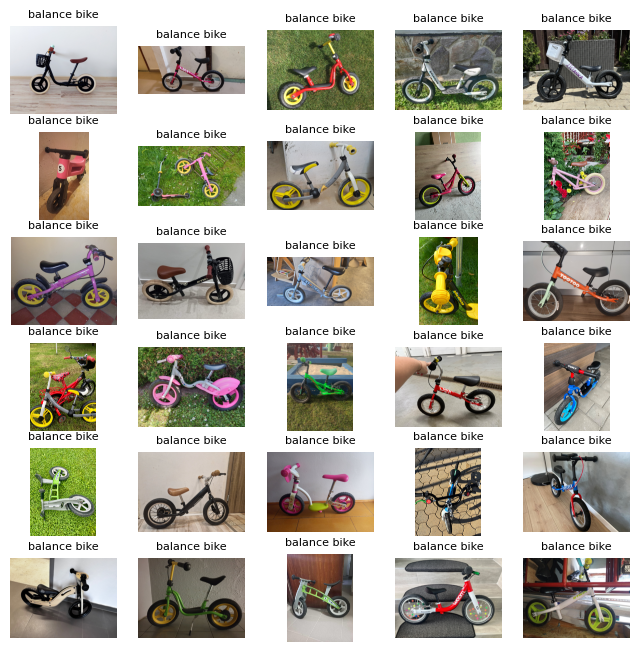

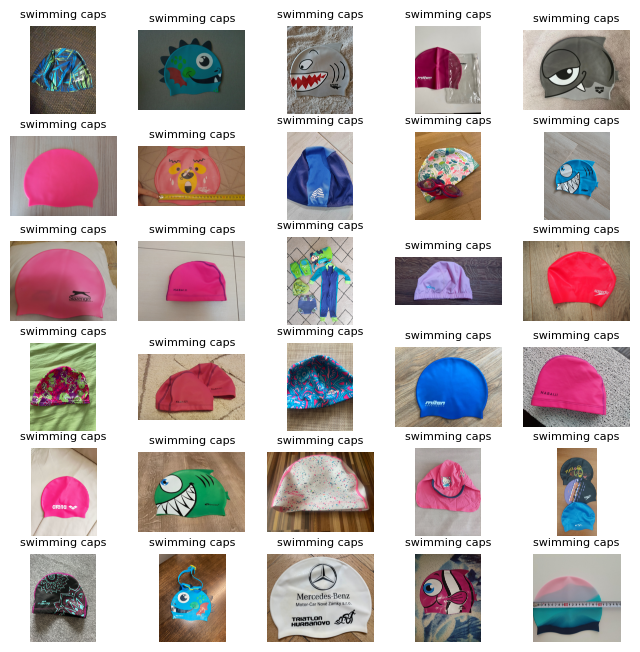

In [7]:
for class_name in [
  'balance bike',
  'swimming caps',
]:
  display_class_samples(class_name)

In [6]:
def compute_class_statistics(dataset: Dataset):
    """Compute class label statistics from ImageFolder dataset."""
    targets = np.array(dataset.targets)
    unique, counts = np.unique(targets, return_counts=True)
    
    stats = {
        "total_images": len(targets),
        "num_classes": len(unique),
        "min_samples": int(counts.min()),
        "max_samples": int(counts.max()),
        "mean_samples": float(counts.mean()),
        "std_samples": float(counts.std()),
    }
    
    # Per-class breakdown
    class_counts = {}
    for idx, count in zip(unique, counts, strict=True):
        class_name = dataset.classes[idx]
        class_counts[class_name] = int(count)
    
    return stats, class_counts

In [7]:
stats, class_counts = compute_class_statistics(full_ds)

print("Filtered Dataset Statistics:")
print(f"  Total images: {stats['total_images']}")
print(f"  Number of classes: {stats['num_classes']}")
print(f"  Min samples/class: {stats['min_samples']}")
print(f"  Max samples/class: {stats['max_samples']}")
print(f"  Mean samples/class: {stats['mean_samples']:.1f}")
print(f"  Std samples/class: {stats['std_samples']:.1f}")

Filtered Dataset Statistics:
  Total images: 138969
  Number of classes: 223
  Min samples/class: 31
  Max samples/class: 998
  Mean samples/class: 623.2
  Std samples/class: 384.9


Find top 10 and bottom 10 classes by count

In [8]:
sorted_counts = sorted(
    [(name, count) for name, count in class_counts.items() 
     #if count >= MIN_SAMPLES_PER_CLASS
     ],
    key=lambda x: x[1], 
    reverse=True
)

print("Top 10 classes:")
for name, count in sorted_counts[:10]:
    pct = 100 * count / stats['total_images']
    print(f"  {name}: {count} ({pct:.2f}%)")

print("\nBottom 10 classes:")
for name, count in sorted_counts[-10:]:
    pct = 100 * count / stats['total_images']
    print(f"  {name}: {count} ({pct:.2f}%)")

Top 10 classes:
  twins: 998 (0.72%)
  feet trousers: 996 (0.72%)
  clothing megapacks: 995 (0.72%)
  ice hockey footwear: 994 (0.72%)
  shorts crops: 994 (0.72%)
  cycling helmets: 993 (0.71%)
  balance bike: 992 (0.71%)
  birth: 991 (0.71%)
  nursing bra: 991 (0.71%)
  nappies: 990 (0.71%)

Bottom 10 classes:
  hiking mats: 39 (0.03%)
  sport massage: 39 (0.03%)
  fishing other: 35 (0.03%)
  floorball clothing: 35 (0.03%)
  golf clothing: 34 (0.02%)
  sport others footwear: 34 (0.02%)
  ball games balls: 32 (0.02%)
  ping pong bedminton other: 32 (0.02%)
  atvs: 31 (0.02%)
  golf clubs: 31 (0.02%)


Show classes with high sample count

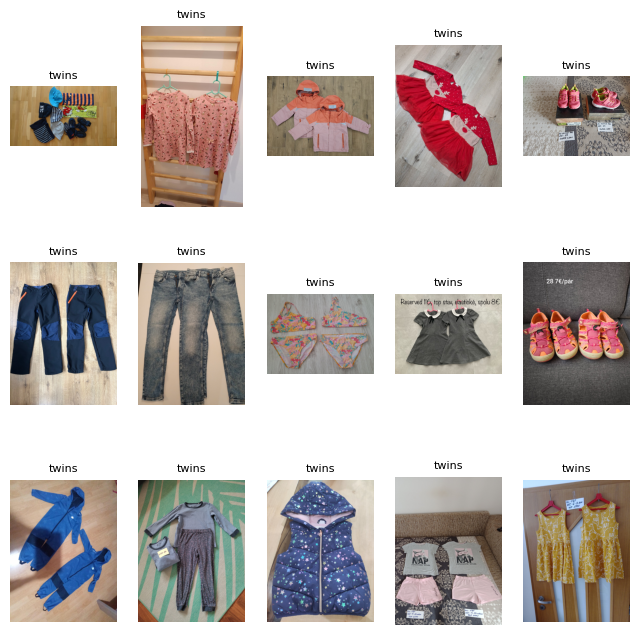

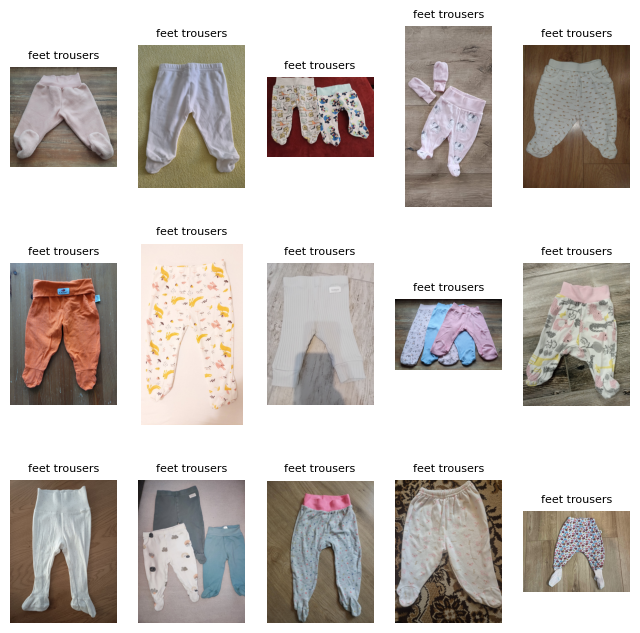

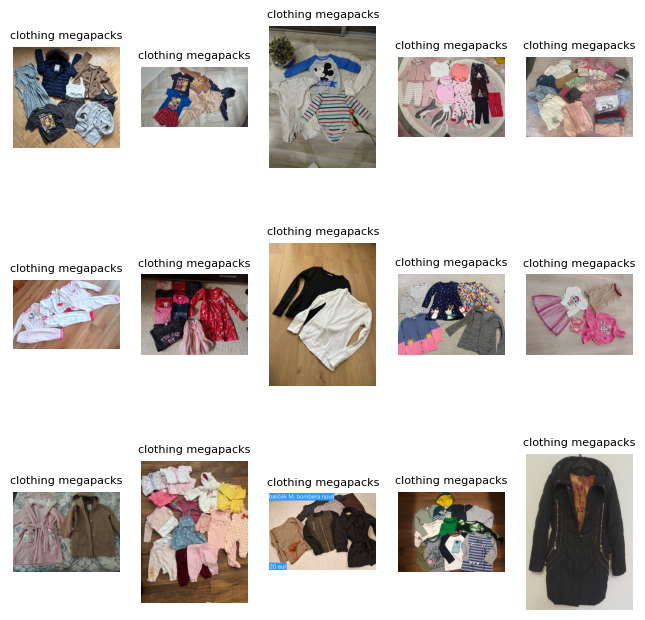

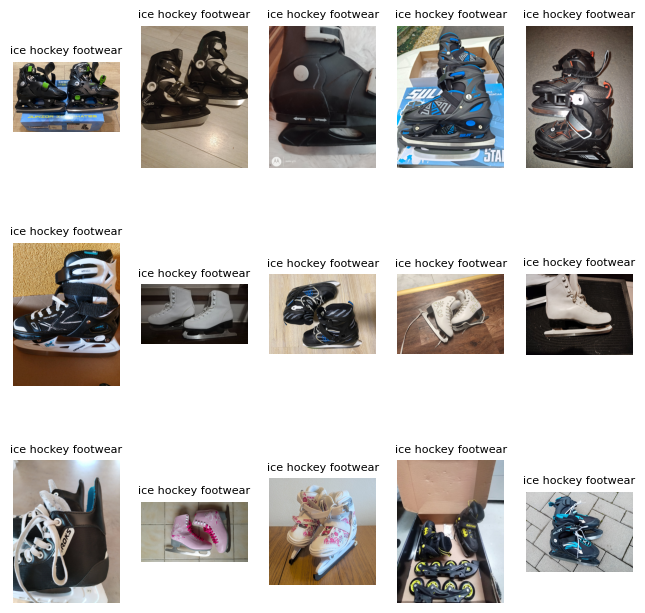

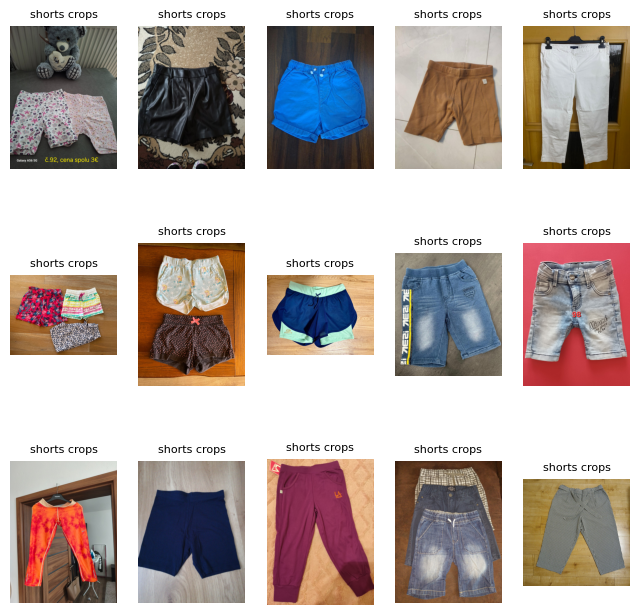

In [ ]:
for class_name in [
  'twins',
  'feet trousers',
  'clothing megapacks',
  'ice hockey footwear',
  'shorts crops',
]:
  display_class_samples(class_name, num_samples=15)

Display classes with low sample count

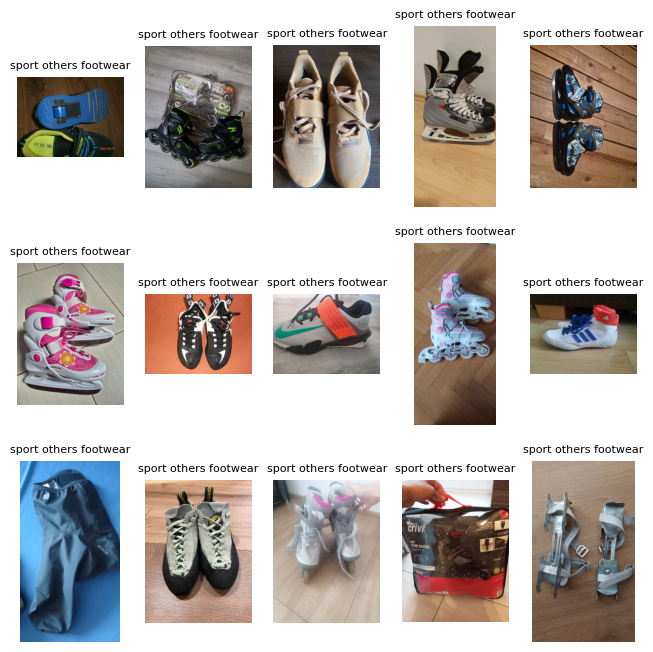

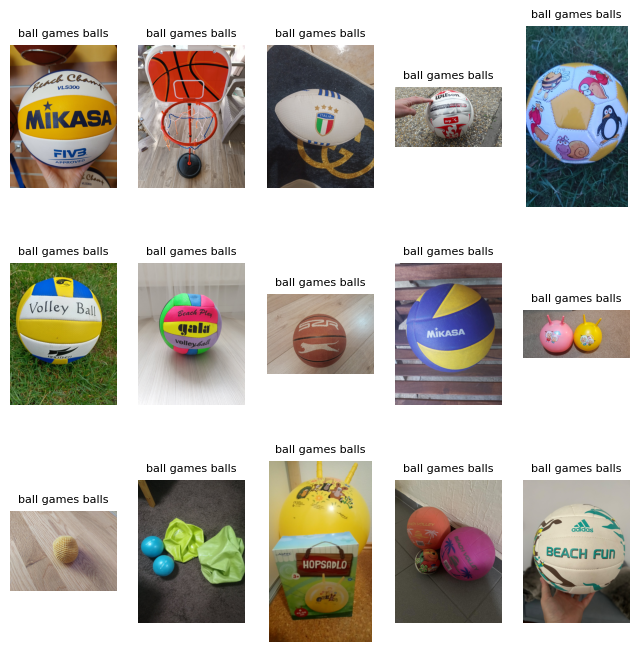

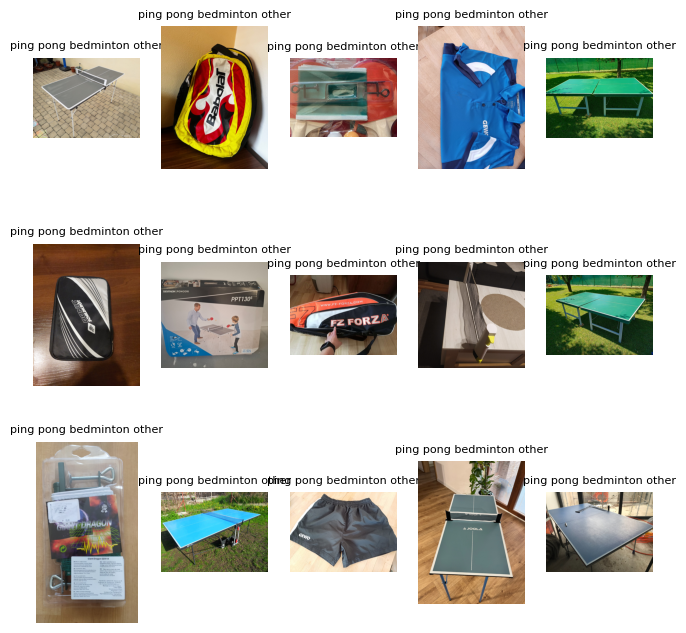

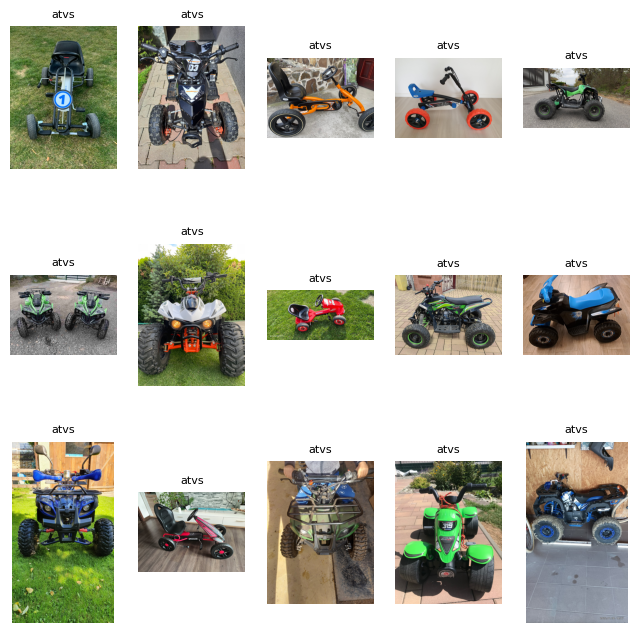

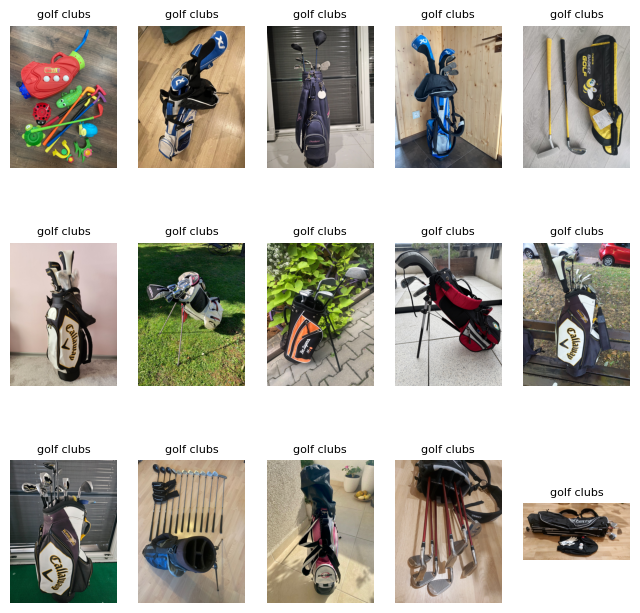

In [ ]:
for class_name in [
  'sport others footwear',
  'ball games balls',
  'ping pong bedminton other',
  'atvs',
  'golf clubs',
]:
  display_class_samples(class_name, num_samples=15)